In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("E:\\Notebooks\\breast_cancer_logistic_regression.csv")
df = df.dropna()
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [20]:
#sigmoid
def sigmoid(x):
    return 1/(1 +  np.exp(-1*x))

In [50]:
#prediction function
def predict(X, theta):
    #print("Multiplying X and theta. X shape: ", X.shape, " Theta shape: ", theta.shape)
    return sigmoid(np.matmul(X,theta))

In [51]:
def calcCost(Y, predicted):
    #log loss error function to be defined here
    error = -1*Y*np.log(predicted) - (1-Y)*np.log(1-predicted)
    cost = np.sum(error)/len(Y)
    return cost
    

In [52]:
def gradientDescent(X, Y, learning_rate, iterations):
    theta = np.zeros(X.shape[1])
    theta = theta.reshape(X.shape[1],1)
    costs = []
    for i in range(0, iterations):
        predicted = predict(X, theta)
        #print("Prediction shape", predicted.shape, theta)
        #print(predicted)
        errors = predicted - Y
        #print(Y)
        costs.append(calcCost(Y, predicted))
        #print("Error shape: ", errors.shape)
        #print("X shape: ", X.T.shape)
        gradient = (1/len(Y))*np.matmul(X.T, errors)
        #print("Gradient Shape ", gradient, gradient.shape)
        theta = theta - learning_rate*gradient
        #print("New theta:  ", theta)
    return theta, costs
    

In [56]:
#Start training

X = df.iloc[:, 0:5]
Y = df['diagnosis']

bias = np.ones(len(X))
bias = pd.Series(bias)
X = pd.merge(bias.to_frame(), X, left_index=True, right_index=True)
X = np.array(X)

Y = np.array(Y)
Y = Y.reshape(len(Y),1)

# theta = np.zeros(X.shape[1])
# theta = theta.reshape(2,1)

# print("Theta shape: ", theta.shape)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

learning_rate = 0.000009 #the less is the learning rate is, the less steep the cost curve will be. That means we will slowly move towards the minimum
iterations = 3000
theta, costs = gradientDescent(X, Y, learning_rate, iterations)
print("Final theta ", theta)
# print(costs)

X shape:  (569, 6)
Y shape:  (569, 1)
Final theta  [[ 0.00190373]
 [ 0.01348932]
 [ 0.02074984]
 [ 0.07777634]
 [-0.01158578]
 [ 0.00012885]]


3000


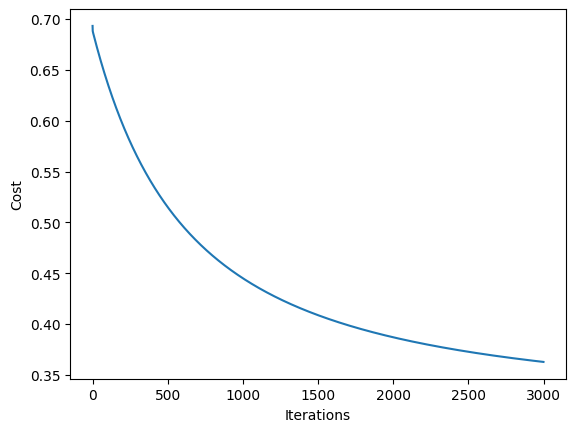

In [57]:
#Plot cost graph
plt.plot(costs, label='Cost')
plt.xlabel(xlabel = "Iterations")
plt.ylabel(ylabel = "Cost")
print(len(costs))